<a href="https://colab.research.google.com/github/vinarestanti/Data-Mining/blob/main/Adaboost_G_231_22_0044.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Nama : Vina Restanti**

# **Nim  : G.231.22.0044**

# **1. Import Library yang diperlukan**


In [ ]:
#load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
#import train_test_split function
from sklearn.model_selection import train_test_split
#import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# **2. Mengambil Dataset menggunakan data iris dari sklearn**

In [ ]:
#load data
iris = datasets.load_iris()
x = iris.data
y = iris.target

# **3. Memisahkan data training dan data testing**

In [ ]:
#spilt dataset into training set test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3) # 70% training and 30% test

# **4. Membuat Model AdaBoost menggunakn Scikit-learn. Ada boost menggunakan pengklasifikasian pohon keputusan sebagai pengklasifikasi default**

In [ ]:
# Create AdaBoost classifier object
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)

# Train Adaboost classifier
model = abc.fit(x_train, y_train)

# Predict the response for test dataset
y_pred = model.predict(x_test)

# **5. Akurasi Model**

In [ ]:
#Model accuracy how  often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


# **6. Import Coding Machine Learning dari Github**

In [ ]:
!git clone https://github.com/eriklindernoren/ML-from-Scratch

Cloning into 'ML-from-Scratch'...
remote: Enumerating objects: 2558, done.
remote: Total 2558 (delta 0), reused 0 (delta 0), pack-reused 2558
Receiving objects: 100% (2558/2558), 553.45 KiB | 2.10 MiB/s, done.
Resolving deltas: 100% (1960/1960), done.


# **mengakses Folder ML-From-Stratch**

In [ ]:
import sys
sys.path.append('/content/ML-From-Scratch')

Training Accuracy: 0.6659707724425887
Test Accuracy: 0.6944444444444444


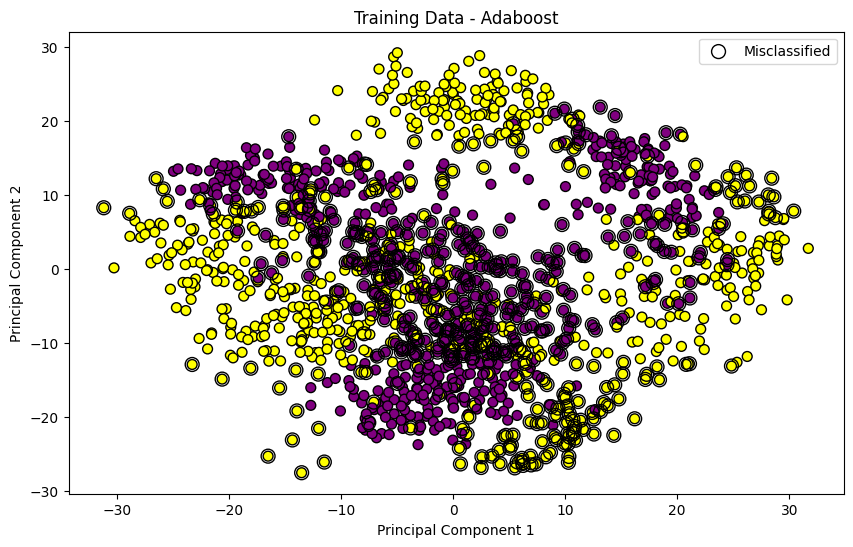

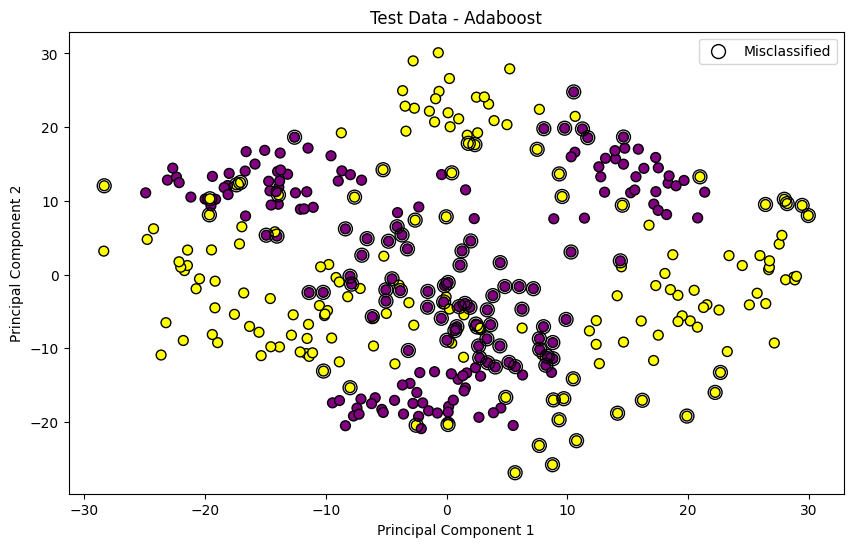

In [ ]:
from __future__ import division, print_function
import numpy as np
import math
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

# Decision stump used as weak classifier in this implementation of Adaboost
class DecisionStump():
    def __init__(self):
        self.polarity = 1
        self.feature_index = None
        self.threshold = None
        self.alpha = None

class Adaboost():
    """Boosting method that uses a number of weak classifiers in
    ensemble to make a strong classifier. This implementation uses decision
    stumps, which is a one level Decision Tree.

    Parameters:
    -----------
    n_clf: int
        The number of weak classifiers that will be used.
    """
    def __init__(self, n_clf=5):
        self.n_clf = n_clf

    def fit(self, X, y):
        n_samples, n_features = np.shape(X)
        # Initialize weights to 1/N
        w = np.full(n_samples, (1 / n_samples))

        self.clfs = []

        for _ in range(self.n_clf):
            clf = DecisionStump()
            min_error = float('inf')

            for feature_i in range(n_features):
                X_column = X[:, feature_i]
                thresholds = np.unique(X_column)

                for threshold in thresholds:
                    p = 1
                    prediction = np.ones(n_samples)
                    prediction[X_column < threshold] = -1

                    error = sum(w[y != prediction])

                    if error > 0.5:
                        error = 1 - error
                        p = -1

                    if error < min_error:
                        clf.polarity = p
                        clf.threshold = threshold
                        clf.feature_index = feature_i
                        min_error = error

            EPS = 1e-10
            clf.alpha = 0.5 * np.log((1.0 - min_error + EPS) / (min_error + EPS))

            predictions = np.ones(n_samples)
            negative_idx = (clf.polarity * X[:, clf.feature_index] < clf.polarity * clf.threshold)
            predictions[negative_idx] = -1

            w *= np.exp(-clf.alpha * y * predictions)
            w /= np.sum(w)

            self.clfs.append(clf)

    def predict(self, X):
        clf_preds = [clf.alpha * np.where(clf.polarity * X[:, clf.feature_index] < clf.polarity * clf.threshold, -1, 1) for clf in self.clfs]
        y_pred = np.sum(clf_preds, axis=0)
        y_pred = np.sign(y_pred)

        return y_pred

def plot_scatter(X, y, y_pred, title):
    plt.figure(figsize=(10, 6))
    colors = ['yellow' if label == -1 else 'purple' for label in y]
    plt.scatter(X[:, 0], X[:, 1], c=colors, marker='o', edgecolor='k', s=50)

    # Plot misclassified points
    misclassified = (y != y_pred)
    plt.scatter(X[misclassified][:, 0], X[misclassified][:, 1], facecolors='none', edgecolors='k', s=100, label='Misclassified')

    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='upper right')
    plt.show()

if __name__ == "__main__":
    data = datasets.load_digits()
    X = data.data
    y = data.target

    # Convert labels to binary
    y = np.where(y <= 4, -1, 1)

    # Apply PCA to reduce dimensions to 2 for visualization
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

    clf = Adaboost(n_clf=5)
    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    print("Training Accuracy:", accuracy_train)
    print("Test Accuracy:", accuracy_test)

    plot_scatter(X_train, y_train, y_pred_train, "Training Data - Adaboost")
    plot_scatter(X_test, y_test, y_pred_test, "Test Data - Adaboost")
